In this notebook, we perform clustering analysis on four well-known datasets: the Iris dataset, the AT&T dataset, the Binary Alphabets, and the Coil-20 dataset. We explore different clustering methods mainly based on k-means, evaluate their performance. For this work, we referred to two articles: [PCA-guided search for K-means](https://www.researchgate.net/publication/269937044_PCA-guided_search_for_K-means) and [K-means Clustering via Principal Component Analysis](https://icml.cc/Conferences/2004/proceedings/papers/262.pdf).

The clustering methods used are as follows:
- K-means++
- K-means with different initializations (R1, R2, HAC)
- PCA-guided K-means, as described in the article: [PCA-guided search for K-means](https://www.researchgate.net/publication/269937044_PCA-guided_search_for_K-means)
- PCA followed by K-means: method in which K-means clustering is applied on PCA-reduced features: [K-means Clustering via Principal Component Analysis](https://icml.cc/Conferences/2004/proceedings/papers/262.pdf)


The **k-means-based methods** are evaluated on four datasets. For each method, we calculate and plot the $J_{\text{best}} $ (as explained in the report) with respect to the number of executions (runs). Subsequently, we compute the confusion matrices and the accuracy of each k-means-based method using the approach detailed in [Accuracy from Classification to Clustering Evaluation](https://smorbieu.gitlab.io/accuracy-from-classification-to-clustering-evaluation/).



In [2]:
import numpy as np 
import seaborn as sns
import os 
import scipy.io
from pprint import pprint
from PIL import Image
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from algorithms import * # Custom algorithms for clustering 
from time_distortion import * # Function to calculate execution time and the best distortion

``datasets_params``dictionary defines clustering parameters for each dataset, including the number of clusters, maximum iterations for k-means, and the number of runs for random initialization.


In [3]:
datasets_params = {
    "IRIS_dataset": {
        "n_clusters": 3, # Number of clusters corresponds to the 3 species in the Iris dataset
        "max_iter": 10, # Maximum iterations for convergence
        "n_runs": 1000 # Number of executions
    },
    "ATT_dataset": {
        "n_clusters": 40, # Number of clusters corresponds to 40 unique individuals in the AT&T dataset
        "max_iter": 10,
        "n_runs": 1000
    },
    "BA_dataset": {
        "n_clusters": 26, # Number of clusters corresponds to 26 letters in the alphabet
        "max_iter": 10,
        "n_runs": 1000
    },
    "coil20_dataset": {
        "n_clusters": 5, # Number of clusters corresponds to 5 items
        "max_iter": 10,
        "n_runs": 1000
    }
}

``clustering_methods`` dictionary defines the methods we evaluate

In [4]:
clustering_methods = {
     "KMeans++": kmeanspp_clustering,
     "PCA-guided KMeans": pca_guided_clustering, # Custom implementation using PCA to guide K-means initialization
     "k-means R1": kmeans_with_r1_initialization, # Random initialization variant 1
     "k-means R2": kmeans_with_r2_initialization, # Random initialization variant 2
     "k-means HAC": hac_initialization, # K-means initialized by a hierarchical approach
     "PCA+kmeans": pca_Kmeans, # Perform PCA to reduce features, then apply K-means
}

# Iris Dataset

The Iris dataset is a classic dataset in machine learning and statistics, consisting of 150 samples from three species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. Each sample has four features: ``sepal length``, ``sepal width``, ``petal length``, and ``petal width``. It is commonly used for testing classification and clustering algorithms due to its well-separated classes and simplicity.


In [5]:
##Load data
from sklearn.datasets import load_iris
input_data = load_iris()
X = input_data.data
feature_names = input_data.feature_names
print(feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
true_labels = input_data.target

In [10]:
import pandas as pd
df = pd.DataFrame(X, columns = input_data.feature_names)
df.head()
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


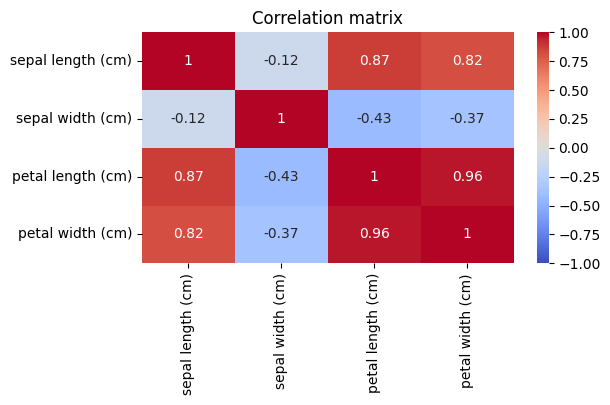

In [11]:
## Correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

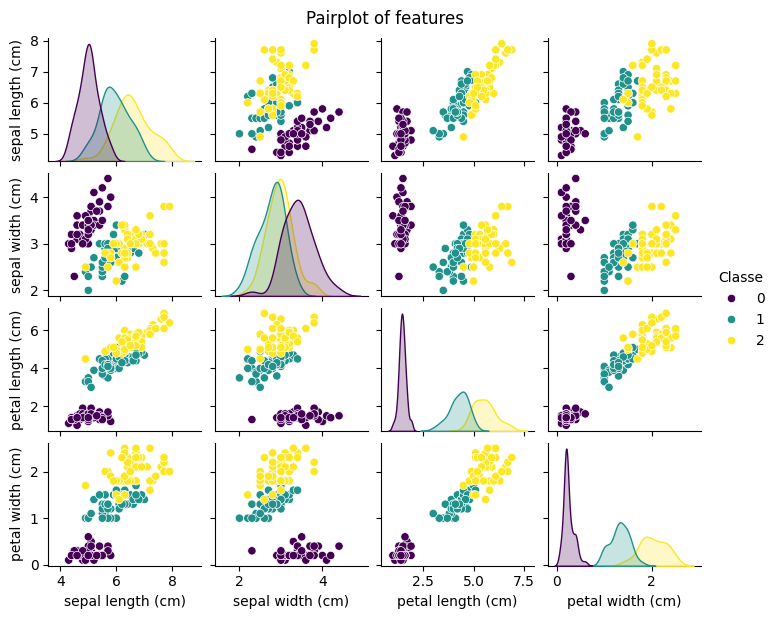

In [12]:

df['Classe'] = input_data.target
sns.pairplot(df, hue='Classe', palette='viridis', height=1.5, aspect=1.2)
plt.suptitle("Pairplot of features", y=1.02)
plt.show()

Evaluating method: KMeans++


KMeans++: 100%|█████████████████████████████████████████████████| 1000/1000 [02:18<00:00,  7.24it/s]


Evaluating method: PCA-guided KMeans


PCA-guided KMeans: 100%|████████████████████████████████████████| 1000/1000 [01:51<00:00,  8.96it/s]


Evaluating method: k-means R1


k-means R1: 100%|███████████████████████████████████████████████| 1000/1000 [02:07<00:00,  7.85it/s]


Evaluating method: k-means R2


k-means R2: 100%|███████████████████████████████████████████████| 1000/1000 [02:09<00:00,  7.70it/s]


Evaluating method: k-means HAC


k-means HAC: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.48it/s]


Evaluating method: PCA+kmeans


PCA+kmeans: 100%|███████████████████████████████████████████████| 1000/1000 [01:41<00:00,  9.82it/s]


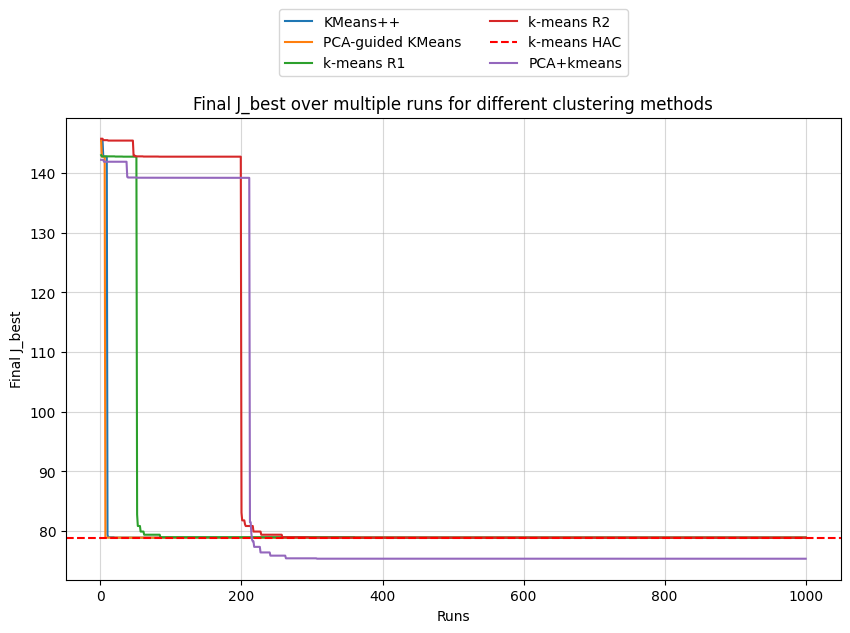

Confusion matrix for KMeans++:


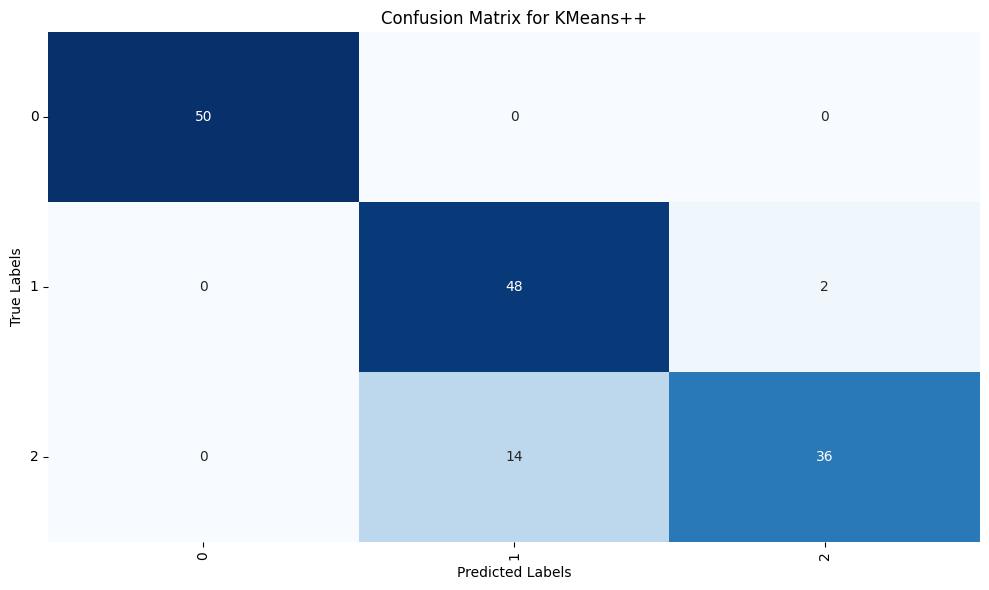

Confusion matrix for PCA-guided KMeans:


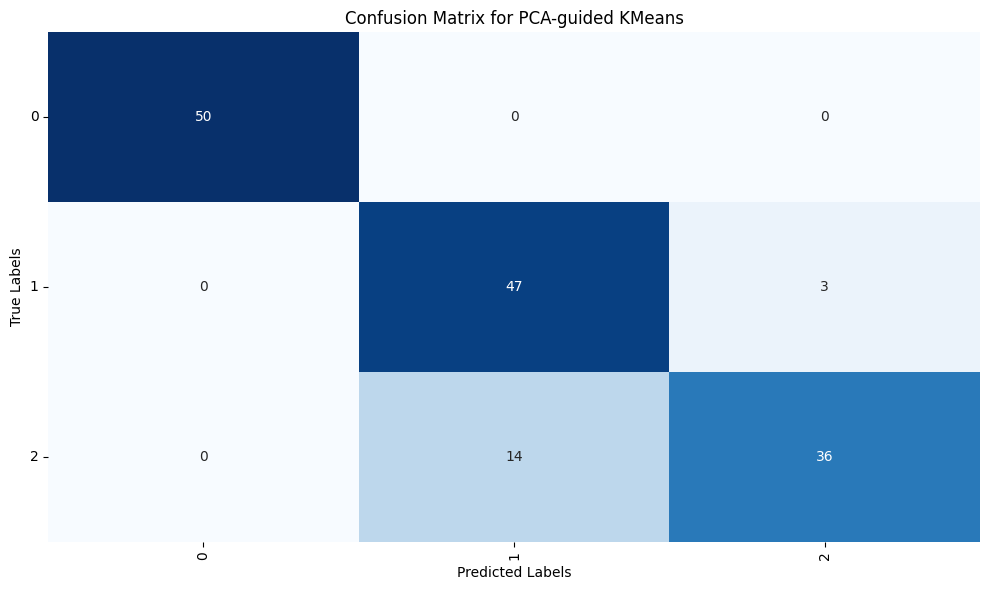

Confusion matrix for k-means R1:


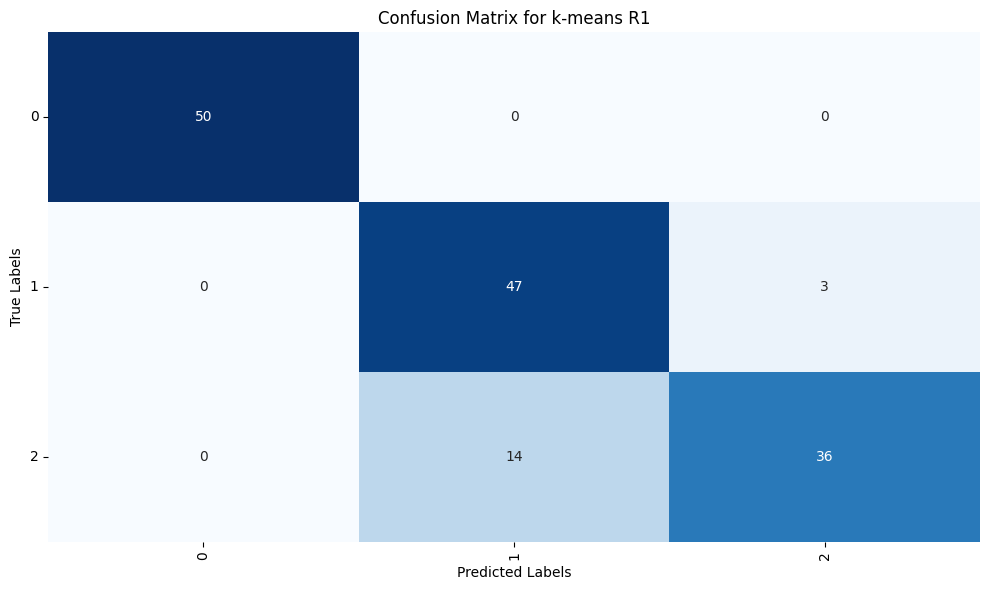

Confusion matrix for k-means R2:


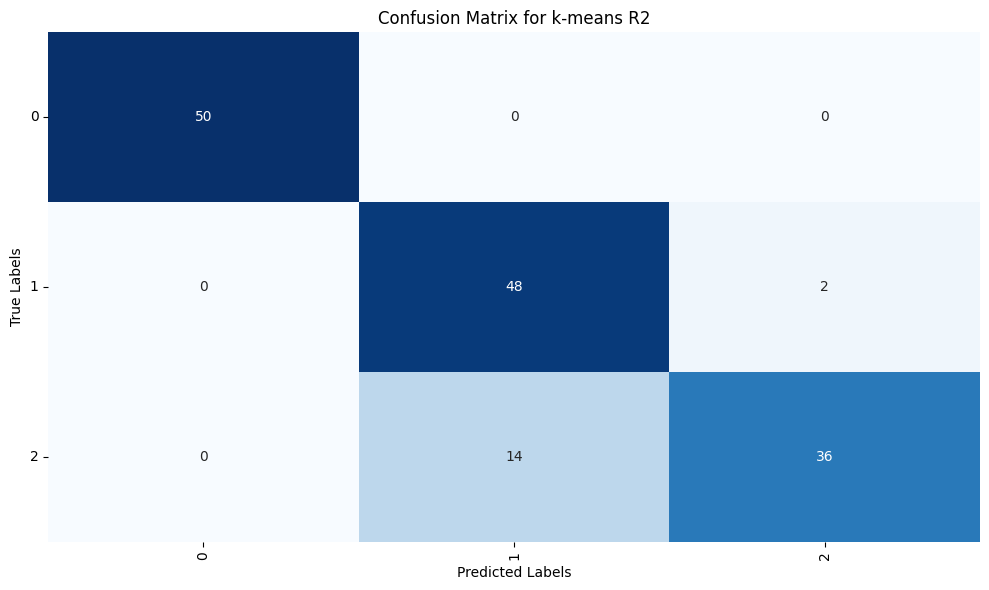

Confusion matrix for k-means HAC:


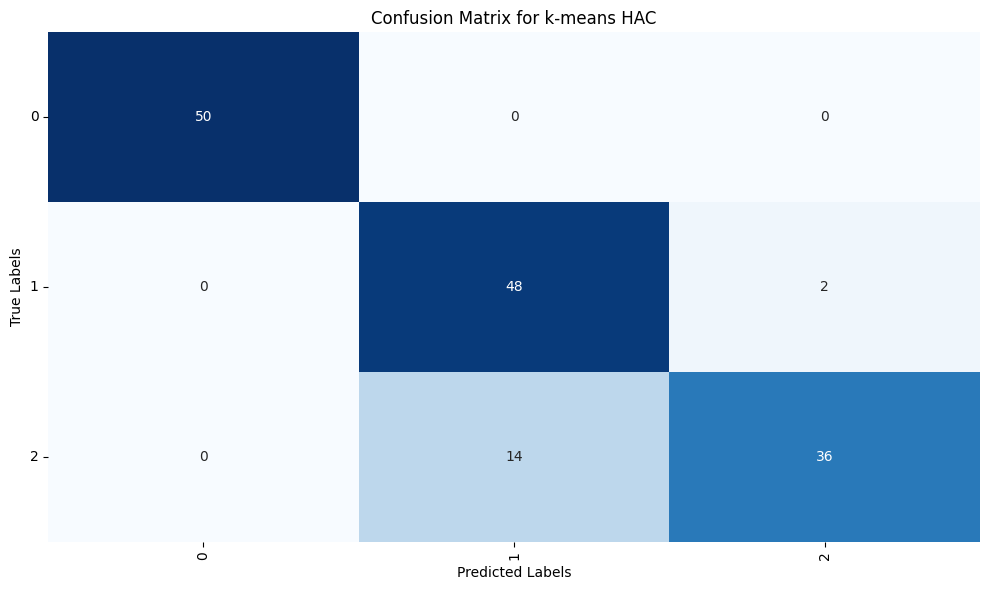

Confusion matrix for PCA+kmeans:


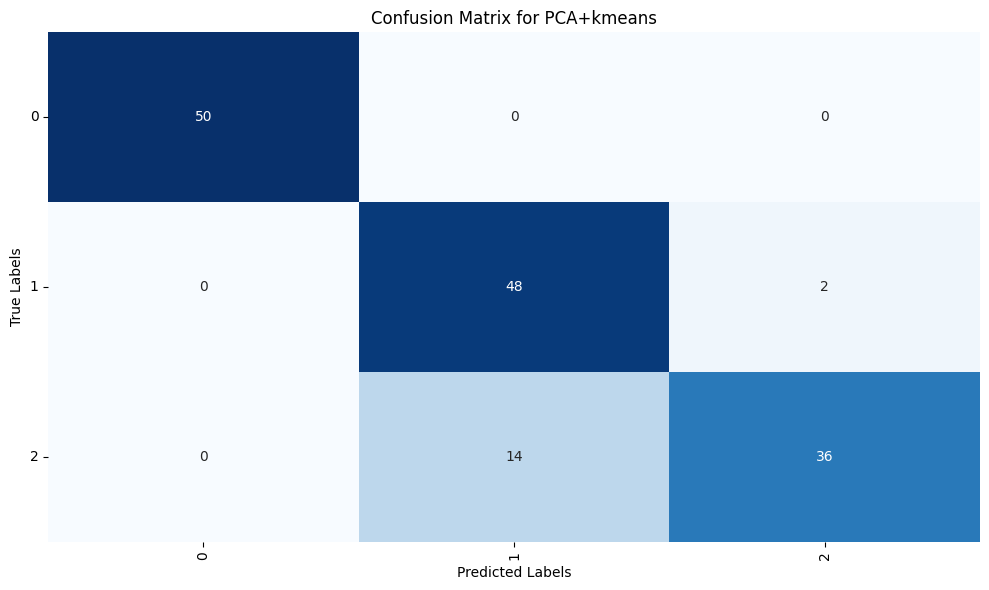


Summary table of execution times and accuracies:
+---+-------------------+--------------------+----------+
|   |      Method       | Execution Time (s) | Accuracy |
+---+-------------------+--------------------+----------+
| 0 |     KMeans++      |     138.071187     | 0.893333 |
| 3 |    k-means R2     |     129.975914     | 0.893333 |
| 4 |    k-means HAC    |      0.134205      | 0.893333 |
| 5 |    PCA+kmeans     |     101.887142     | 0.893333 |
| 1 | PCA-guided KMeans |     111.681446     | 0.886667 |
| 2 |    k-means R1     |     127.382736     | 0.886667 |
+---+-------------------+--------------------+----------+


In [7]:
iris_params = datasets_params["IRIS_dataset"]
n_clusters = iris_params["n_clusters"]
max_iter = iris_params["max_iter"]
n_runs = iris_params["n_runs"]

evaluate_clustering_methods_over_runs(X, true_labels,
                                      n_clusters, max_iter, n_runs, clustering_methods)

## AT&T dataset
The AT&T dataset, also known as the ORL (Olivetti Research Laboratory) face dataset, contains images of 40 different individuals, each with 10 grayscale images. These images capture variations in facial expressions, lighting conditions, and head poses, making it a commonly used dataset for testing facial recognition and clustering algorithms. Each image is of size 92x112 pixels, and the dataset is often used to benchmark feature extraction and clustering methods in computer vision tasks.


In [7]:
import os

# Retrieve the current directory
current_directory = os.getcwd()

data_path = os.path.join(current_directory, "Data", "AT&T")

print("The path is :", data_path)


The path is : c:\Users\naim\Desktop\MVA-Courses\Graphical_models_final\Graphical_models\Graphical_models\Final_version2\Data\AT&T


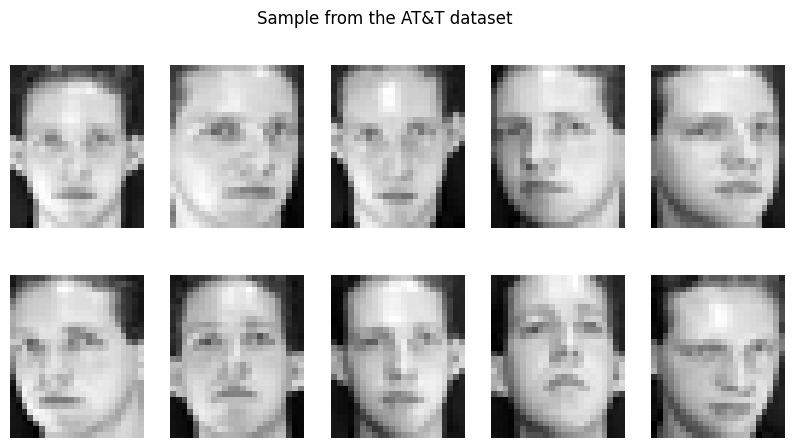

The number of images is consistent with the number of labels.
All expected labels are present.
Loaded image labels:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24,

In [8]:
# Load the dataset
def load_att_dataset_images(base_path):
    images = []
    X = []
    labels = []
    for person_id in range(1, 41):  # Loop through the person folders
        person_folder = base_path / f"s{person_id}"
        if not person_folder.exists():
            print(f"Person folder not found: {person_folder}")
            continue
        for img_id in range(1, 11):  # Loop through the images of each person
            img_path = person_folder / f"{img_id}.pgm"
            if not img_path.exists():
                print(f"File not found: {img_path}")
                continue
            try:
                img = Image.open(img_path).resize((23, 28))  # Resize images
                img_array = np.array(img)
                images.append(img_array)
                X.append(img_array.flatten())
                labels.append(person_id - 1)  # Add person ID as label, starting from 0
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    return images, X, labels

def display_images(images, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(min(num_images, len(images))):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.suptitle("Sample from the AT&T dataset")
    plt.show()


# Retrieve AT&T path
current_directory = os.getcwd()
data_path = os.path.join(current_directory, "Data", "AT&T")
base_path = Path(data_path)

# Load the images
images, X_ATT, labels = load_att_dataset_images(base_path)

# Check if images have been loaded
if not images:
    print("No images were loaded. Please check the dataset path and folder structure.")
else:
    # Display images
    display_images(images)

# Check that the number of images and labels is consistent
if len(images) == len(labels):
    print("The number of images is consistent with the number of labels.")
else:
    print(f"Inconsistency between the number of images and labels: {len(images)} images and {len(labels)} labels.")

# Verify that the labels cover all expected classes
expected_labels = set(range(40))
actual_labels = set(labels)

if expected_labels == actual_labels:
    print("All expected labels are present.")
else:
    missing_labels = expected_labels - actual_labels
    print(f"Some labels are missing: {missing_labels}")

if labels:
    print("Loaded image labels:")
    print(labels)


Evaluating method: KMeans++


KMeans++: 100%|█████████████████████████████████████████████████| 1000/1000 [08:46<00:00,  1.90it/s]


Evaluating method: PCA-guided KMeans


PCA-guided KMeans: 100%|████████████████████████████████████████| 1000/1000 [04:01<00:00,  4.14it/s]


Evaluating method: k-means R1


k-means R1:   2%|▉                                                | 20/1000 [00:05<03:47,  4.32it/s]c:\Users\naim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (39) found smaller than n_clusters (40). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
k-means R1:   4%|█▊                                               | 36/1000 [00:09<03:50,  4.18it/s]c:\Users\naim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (39) found smaller than n_clusters (40). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
k-means R1:   4%|██                                               | 41/1000 [00:10<03:46,  4.24it/s]c:\Users\naim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (39) found smaller

Evaluating method: k-means R2


k-means R2: 100%|███████████████████████████████████████████████| 1000/1000 [03:14<00:00,  5.14it/s]


Evaluating method: k-means HAC


k-means HAC: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.98it/s]


Evaluating method: PCA+kmeans


PCA+kmeans:  25%|███████████▊                                    | 247/1000 [00:39<02:22,  5.30it/s]c:\Users\naim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (39) found smaller than n_clusters (40). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
PCA+kmeans:  30%|██████████████▎                                 | 299/1000 [00:46<01:29,  7.82it/s]c:\Users\naim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (39) found smaller than n_clusters (40). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
PCA+kmeans:  42%|████████████████████▎                           | 423/1000 [01:06<01:30,  6.39it/s]c:\Users\naim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (39) found smaller

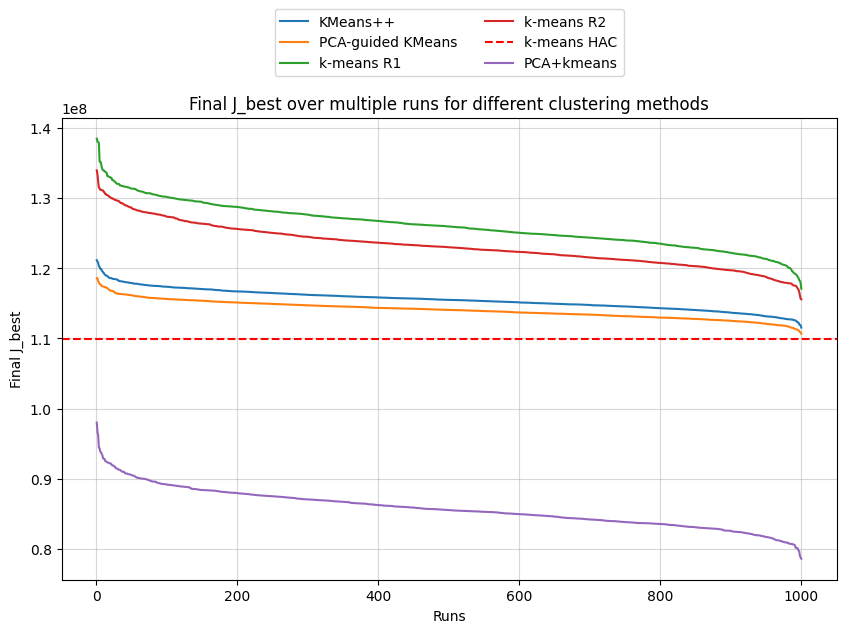

Confusion matrix for KMeans++:


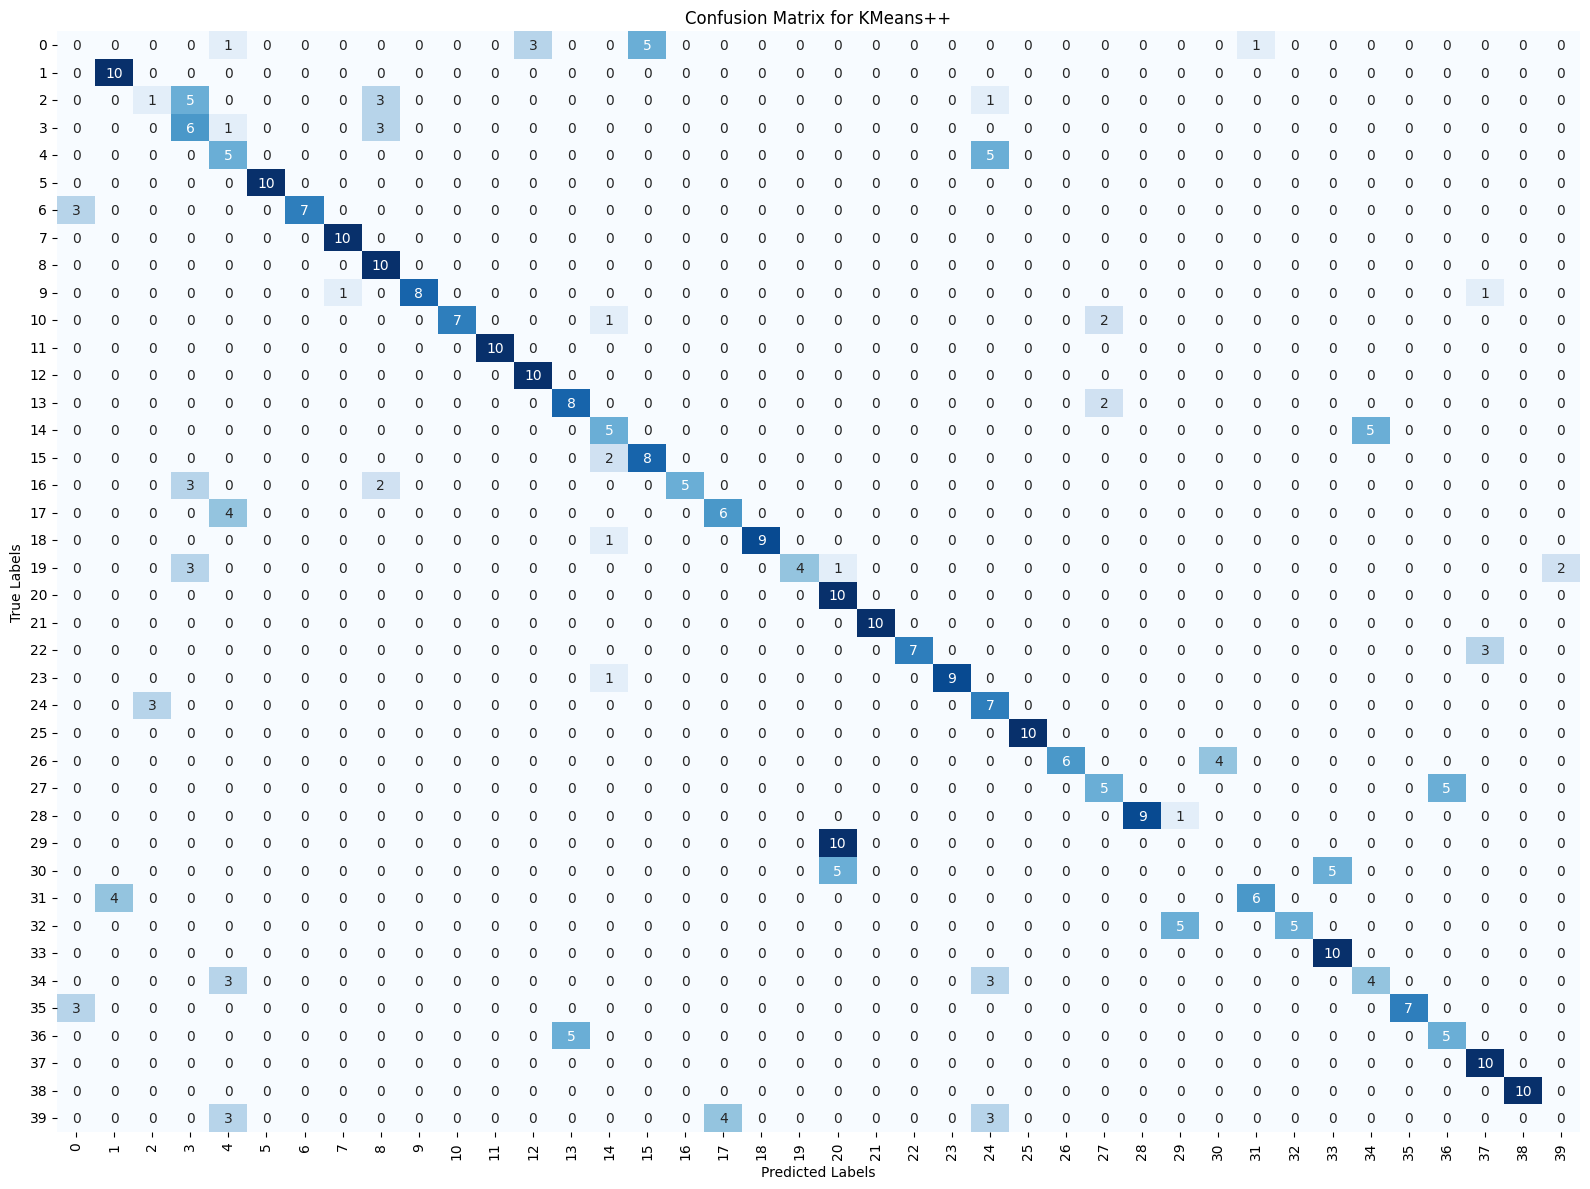

Confusion matrix for PCA-guided KMeans:


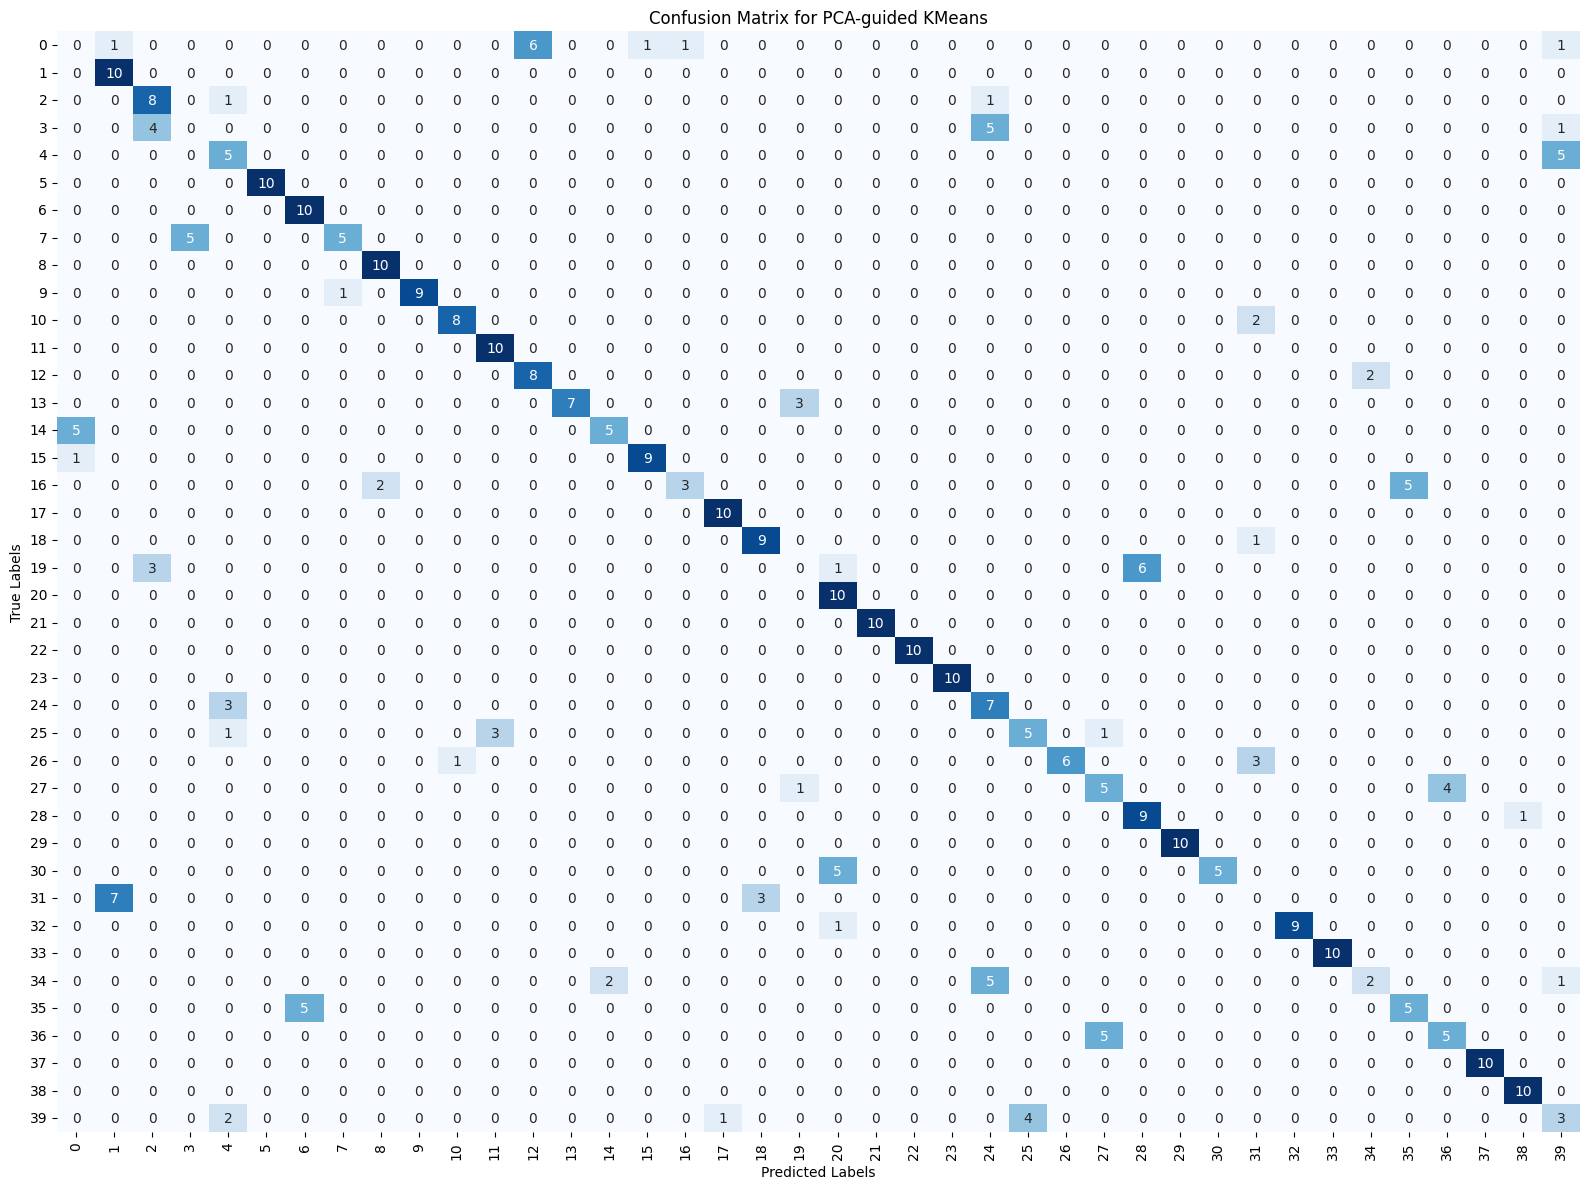

Confusion matrix for k-means R1:


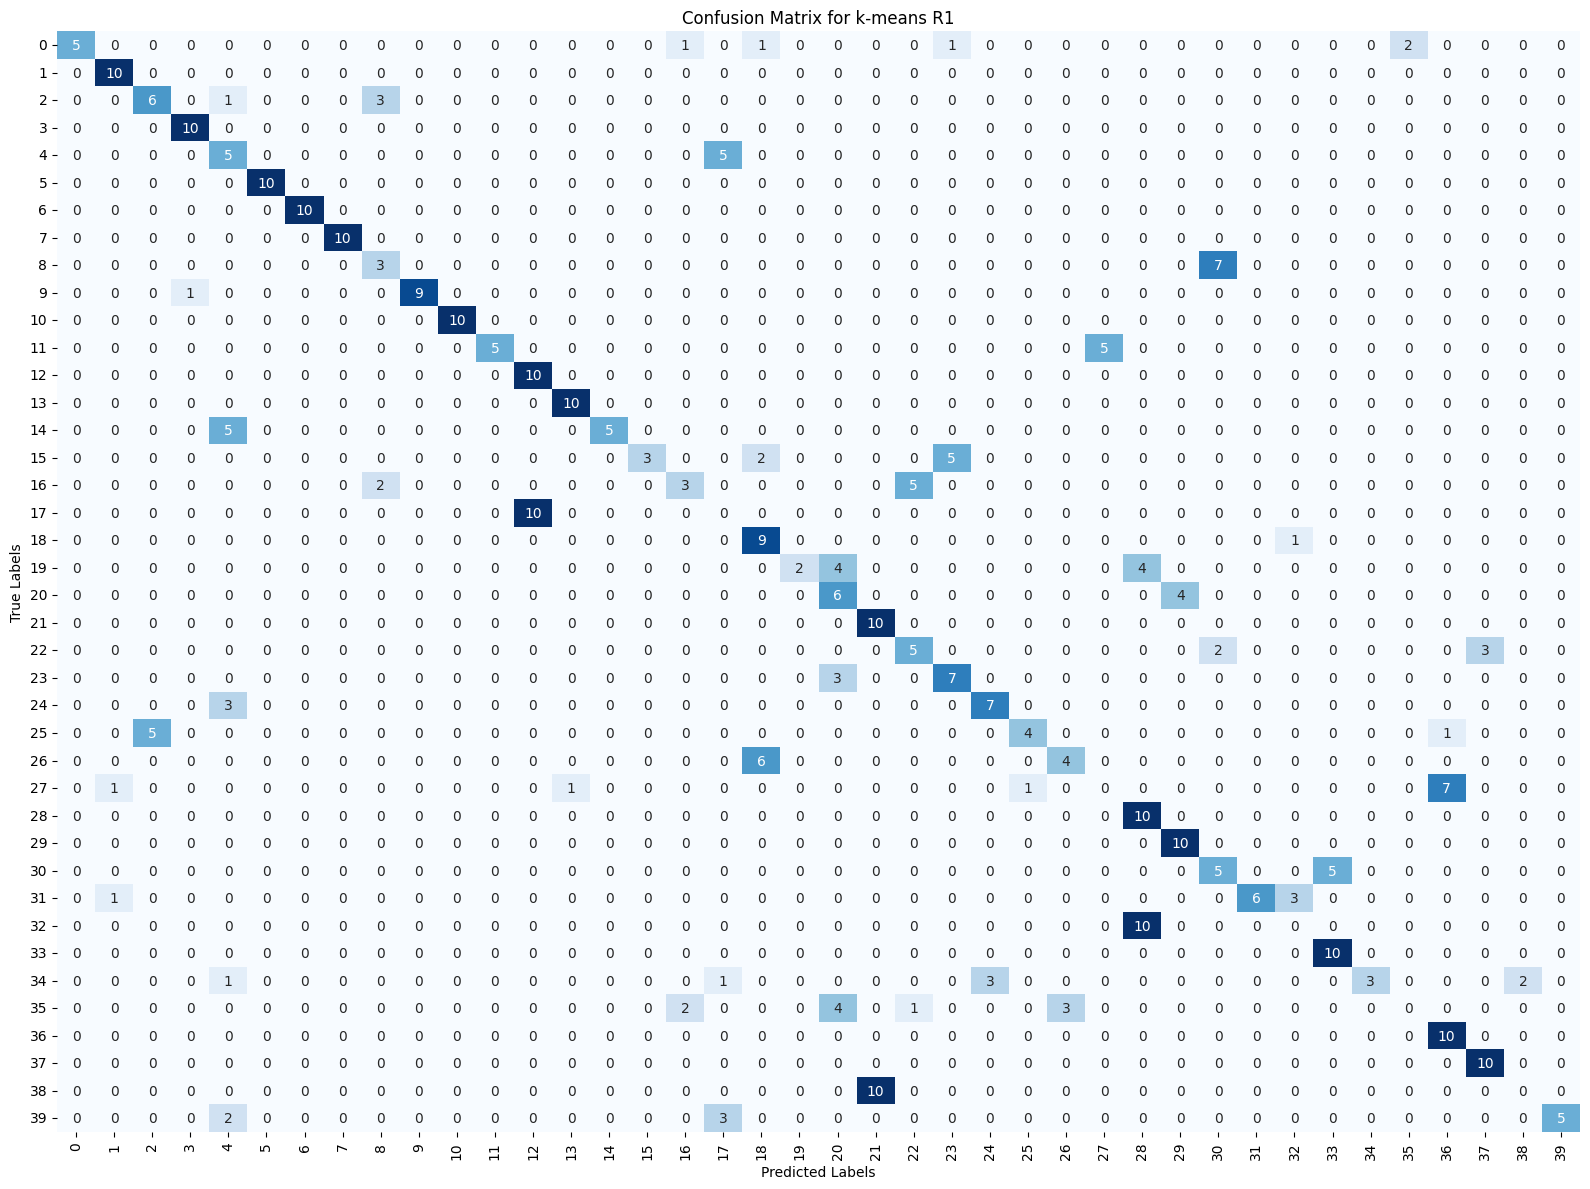

Confusion matrix for k-means R2:


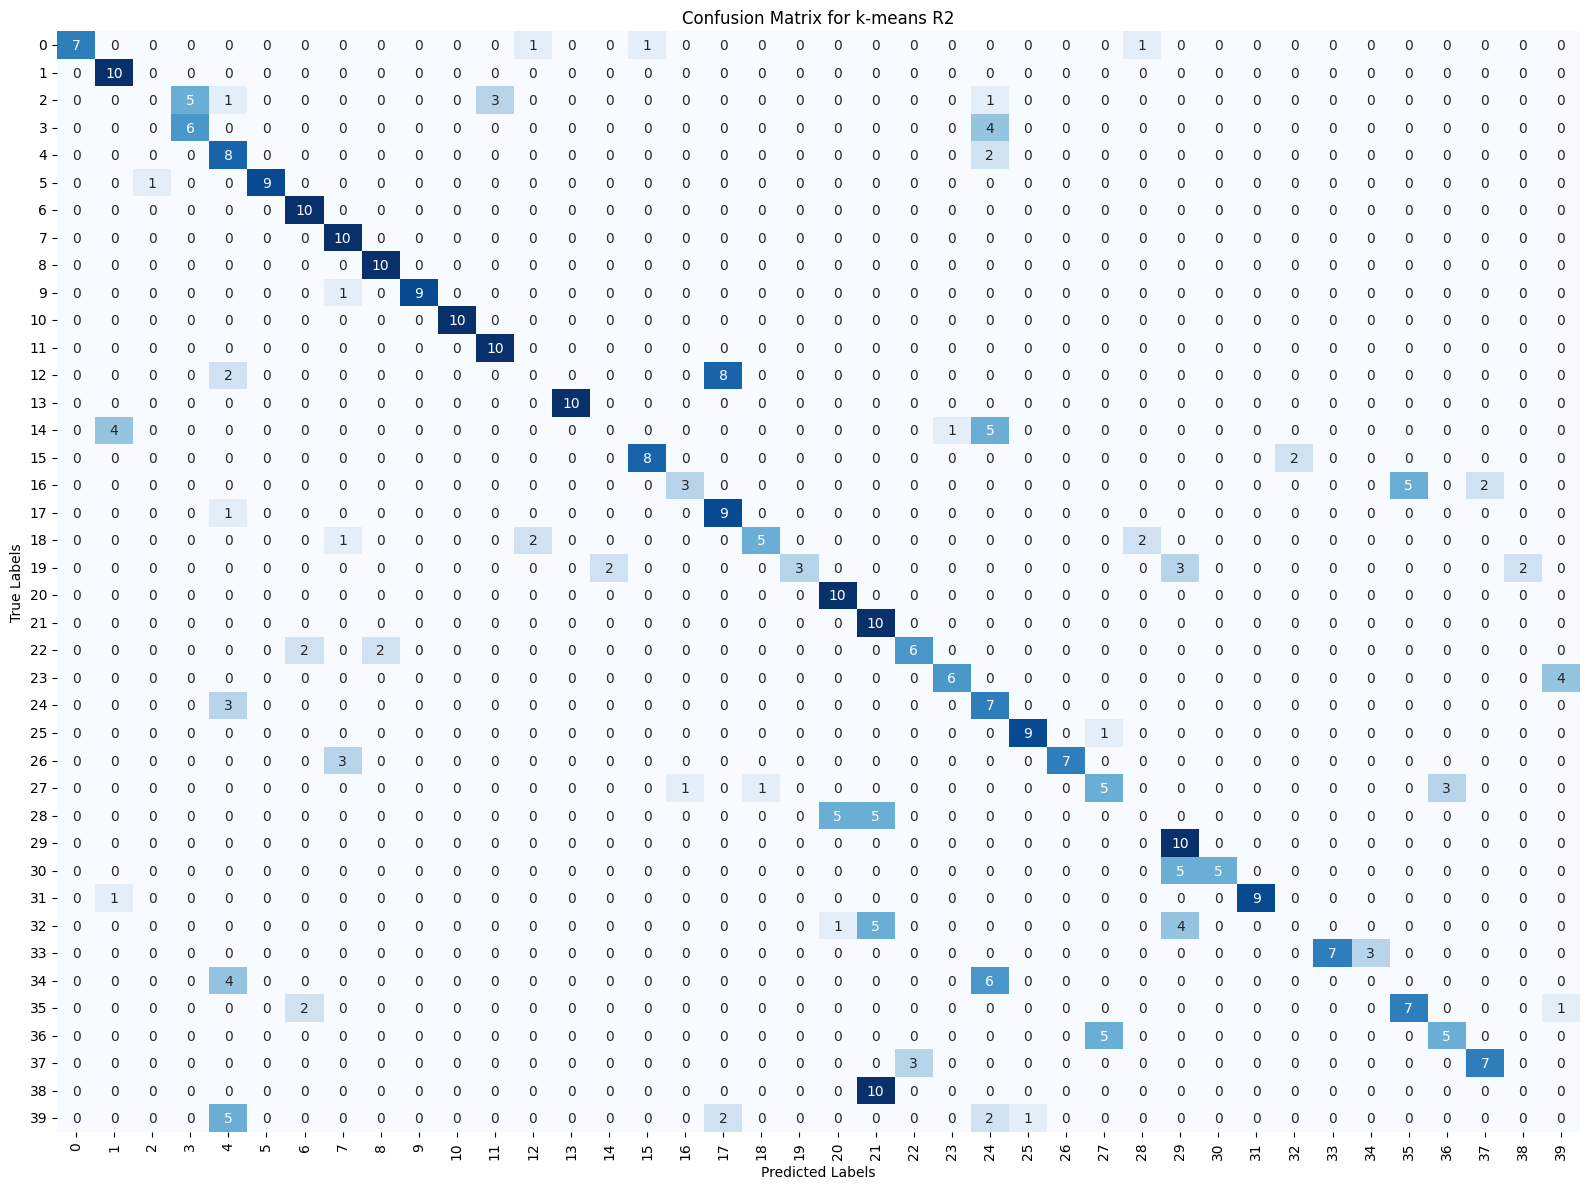

Confusion matrix for k-means HAC:


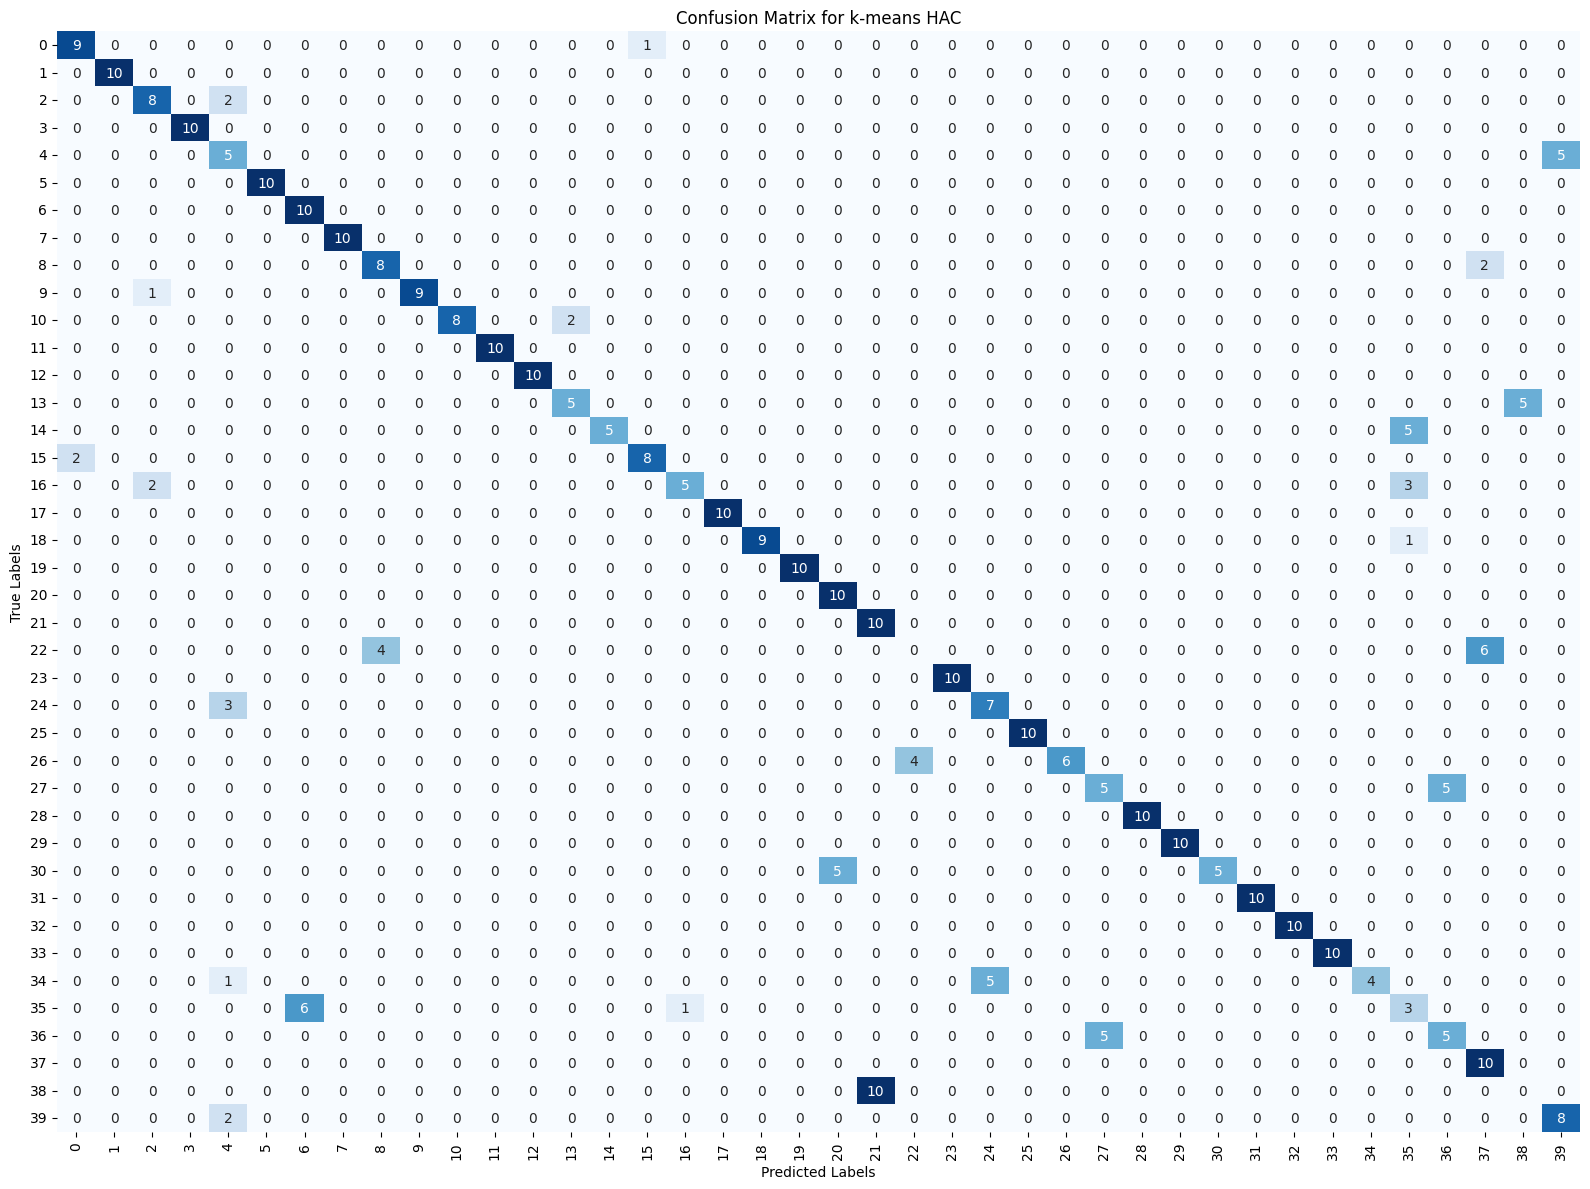

Confusion matrix for PCA+kmeans:


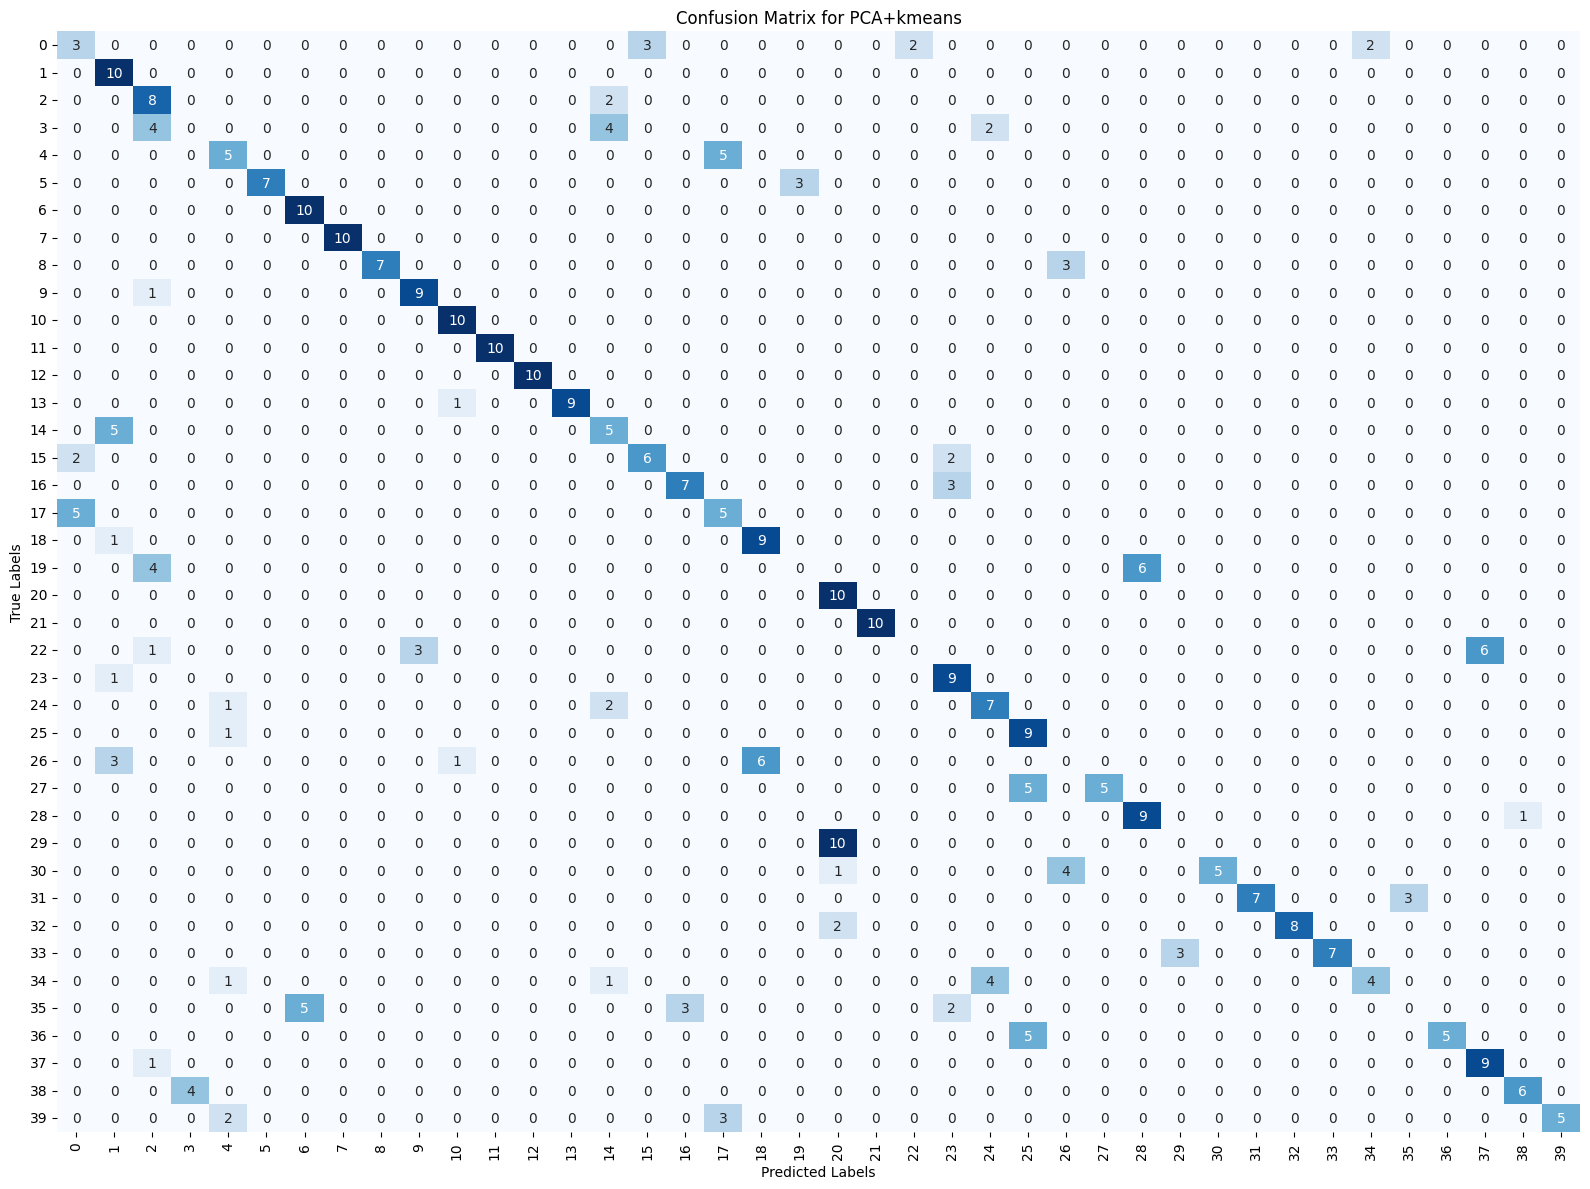


Summary table of execution times and accuracies:
+---+-------------------+--------------------+----------+
|   |      Method       | Execution Time (s) | Accuracy |
+---+-------------------+--------------------+----------+
| 4 |    k-means HAC    |      0.205094      | 0.780000 |
| 1 | PCA-guided KMeans |     241.590790     | 0.712952 |
| 0 |     KMeans++      |     526.684444     | 0.696093 |
| 5 |    PCA+kmeans     |     164.059981     | 0.629383 |
| 3 |    k-means R2     |     194.386692     | 0.608082 |
| 2 |    k-means R1     |     254.810428     | 0.584810 |
+---+-------------------+--------------------+----------+


In [9]:
ATT_params = datasets_params["ATT_dataset"]
n_clusters = ATT_params["n_clusters"]
max_iter = ATT_params["max_iter"]
n_runs = ATT_params["n_runs"]

evaluate_clustering_methods_over_runs(X_ATT, labels,
                                      n_clusters, max_iter, n_runs, clustering_methods)

## Binary Alphabet 

The Binary Alphabet dataset contains images representing the 26 letters of the English alphabet in binary format. Each image is typically a black and white representation, where pixels are either 0 (black) or 1 (white). This dataset is commonly used for testing clustering and classification algorithms, as it involves distinguishing between the different letters based on simple binary features. The dataset is useful for evaluating methods in pattern recognition and optical character recognition (OCR).


Keys in the .mat file:
dict_keys(['__header__', '__version__', '__globals__', 'dat', 'numclass', 'classlabels', 'classcounts'])

--- Analysis of 'dat' ---
Type: <class 'numpy.ndarray'>
Shape: (36, 39)
Data type: object

Example data (first 2 entries):
[[array([[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
         [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
         [0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
         [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
         [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
         [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
         [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
         [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
         [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
         [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
         [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

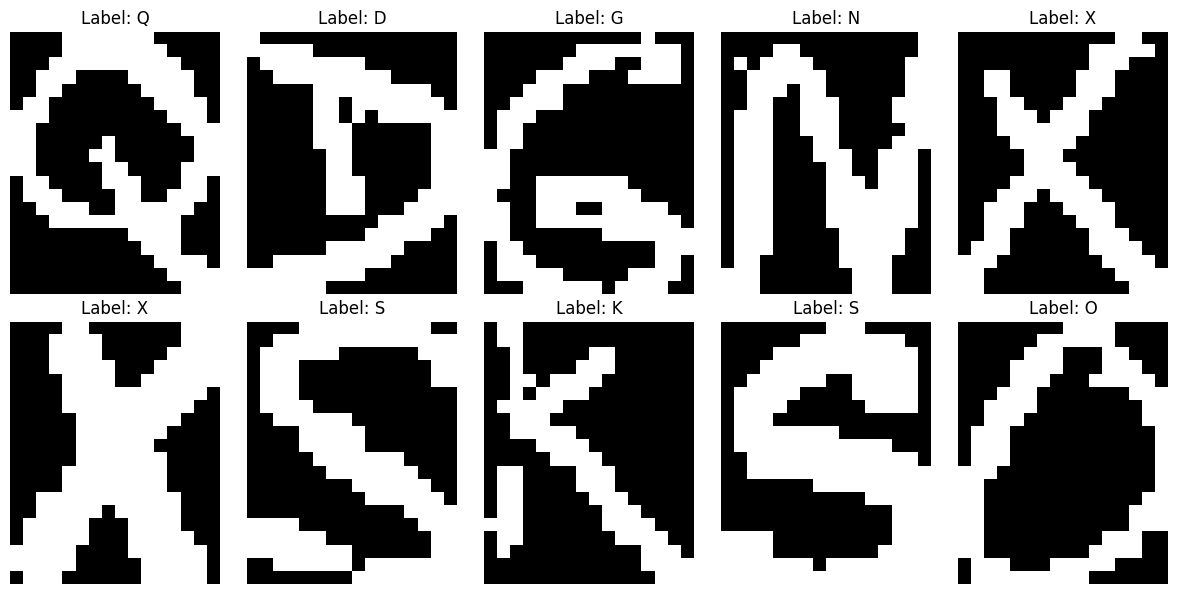

In [10]:
from sklearn.preprocessing import LabelEncoder

# Define the path to the .mat file
current_directory = os.getcwd()
file_path = os.path.join(current_directory, "Data", "binaryalphadigs.mat")
data_path = Path(file_path)

# Load the .mat file
data = scipy.io.loadmat(data_path)

# Display keys in the .mat file
print("Keys in the .mat file:")
print(data.keys())

# Check if 'dat' key exists and inspect its structure
if 'dat' in data:
    dat = data['dat']
    print("\n--- Analysis of 'dat' ---")
    print(f"Type: {type(dat)}")
    print(f"Shape: {dat.shape}")
    print(f"Data type: {dat.dtype}")
    
    print("\nExample data (first 2 entries):")
    print(dat[:2, :2])  
    
    # Initialize lists to hold flattened images and labels
    flattened_images = []
    labels = []
    
    # Iterate through each class (row)
    for class_idx in range(dat.shape[0]):
        # Skip classes labeled '0' to '9' 
        if class_idx <= 9:
            continue  
        
        # Determine the label based on class index (only letters)
        label = chr(ord('A') + (class_idx - 10))  # Labels 'A' to 'Z'
        
        # Only letters
        for sample_idx in range(dat.shape[1]):
            image = dat[class_idx, sample_idx]  
            if isinstance(image, np.ndarray):
                flattened = image.flatten()  
                flattened_images.append(flattened)
                labels.append(label)
            else:
                print(f"Warning: dat[{class_idx}, {sample_idx}] is not a NumPy array.")
    
    X = np.array(flattened_images)
    AB_labels = np.array(labels)
    
    print(f"\nShape of X: {X.shape}")  # (26*39, n_features) since digits are excluded
    print(f"Shape of AB_labels: {AB_labels.shape}")  # (26*39,)
    
    print(f"\nSample Labels (one from each class): {[AB_labels[i*39] for i in range(26)]}")
    
    # Encode labels to integers
    if len(AB_labels) > 0:
        label_encoder = LabelEncoder()
        AB_labels_encoded = label_encoder.fit_transform(AB_labels)
        
        print("\n--- Encoded AB_labels ---")
        print(AB_labels_encoded[:15])
    else:
        print("\nAB_labels could not be extracted. Please verify the dataset structure.")
    
    # Visualize some random examples to verify
    n_samples_visualize = 10
    indices = np.random.choice(X.shape[0], n_samples_visualize, replace=False)
    
    sample_image = dat[10, 0]  # Start from class_idx=10 which corresponds to 'A'
    if isinstance(sample_image, np.ndarray):
        image_height, image_width = sample_image.shape
    else:
        raise ValueError("Sample image is not a NumPy array.")
    
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[idx].reshape(image_height, image_width), cmap='gray')
        plt.title(f"Label: {AB_labels[idx]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("The key 'dat' does not exist in the .mat file.")


Evaluating method: KMeans++


KMeans++: 100%|█████████████████████████████████████████████████| 1000/1000 [08:23<00:00,  1.99it/s]


Evaluating method: PCA-guided KMeans


PCA-guided KMeans: 100%|████████████████████████████████████████| 1000/1000 [03:33<00:00,  4.69it/s]


Evaluating method: k-means R1


k-means R1: 100%|███████████████████████████████████████████████| 1000/1000 [03:07<00:00,  5.34it/s]


Evaluating method: k-means R2


k-means R2: 100%|███████████████████████████████████████████████| 1000/1000 [02:53<00:00,  5.75it/s]


Evaluating method: k-means HAC


k-means HAC: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.68it/s]


Evaluating method: PCA+kmeans


PCA+kmeans: 100%|███████████████████████████████████████████████| 1000/1000 [01:32<00:00, 10.83it/s]


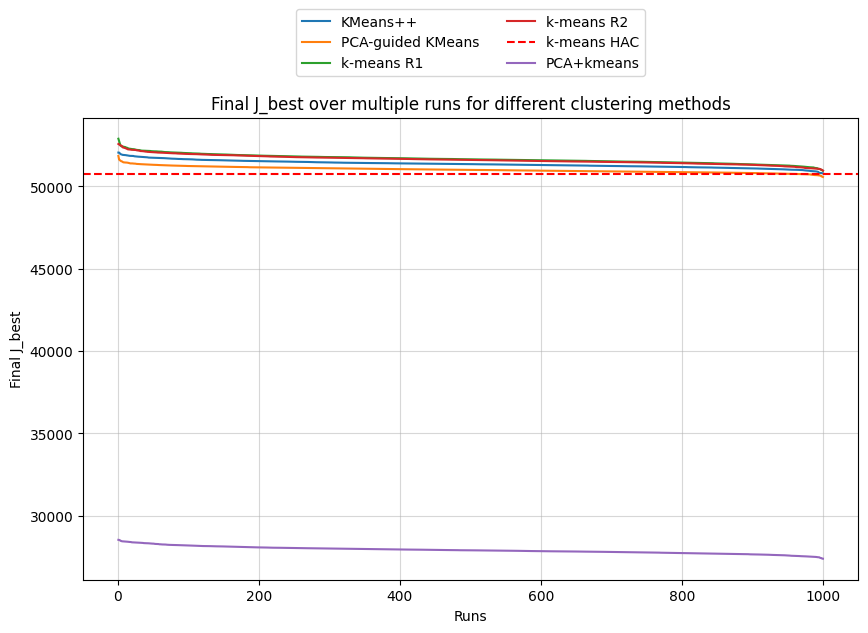

Confusion matrix for KMeans++:


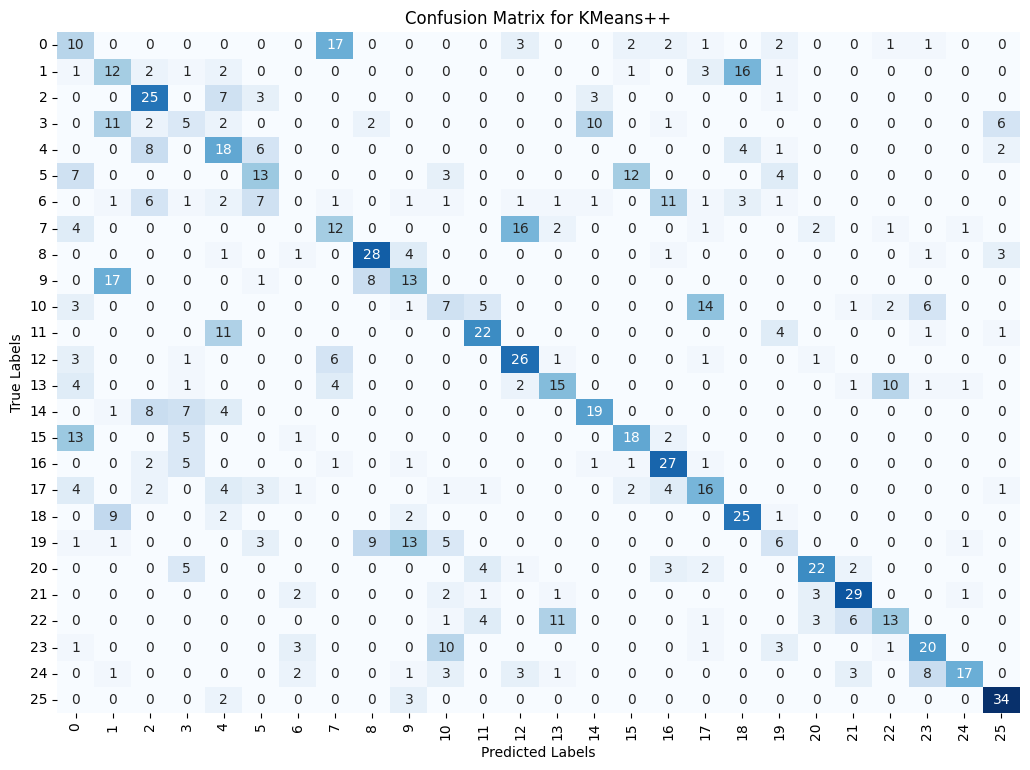

Confusion matrix for PCA-guided KMeans:


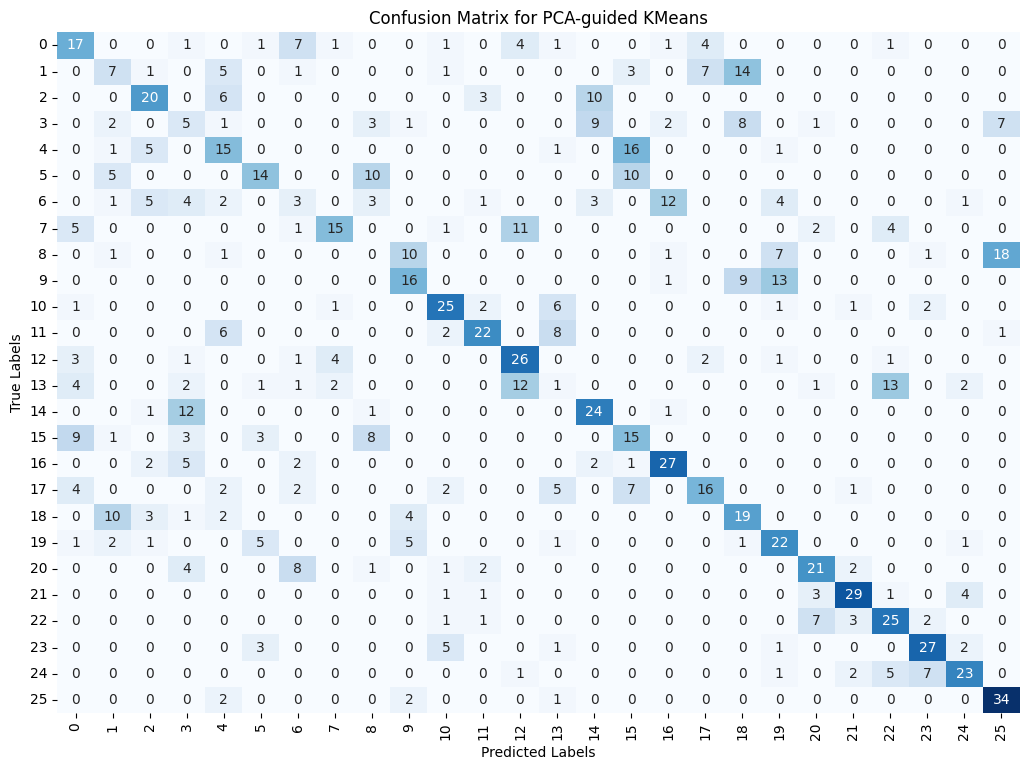

Confusion matrix for k-means R1:


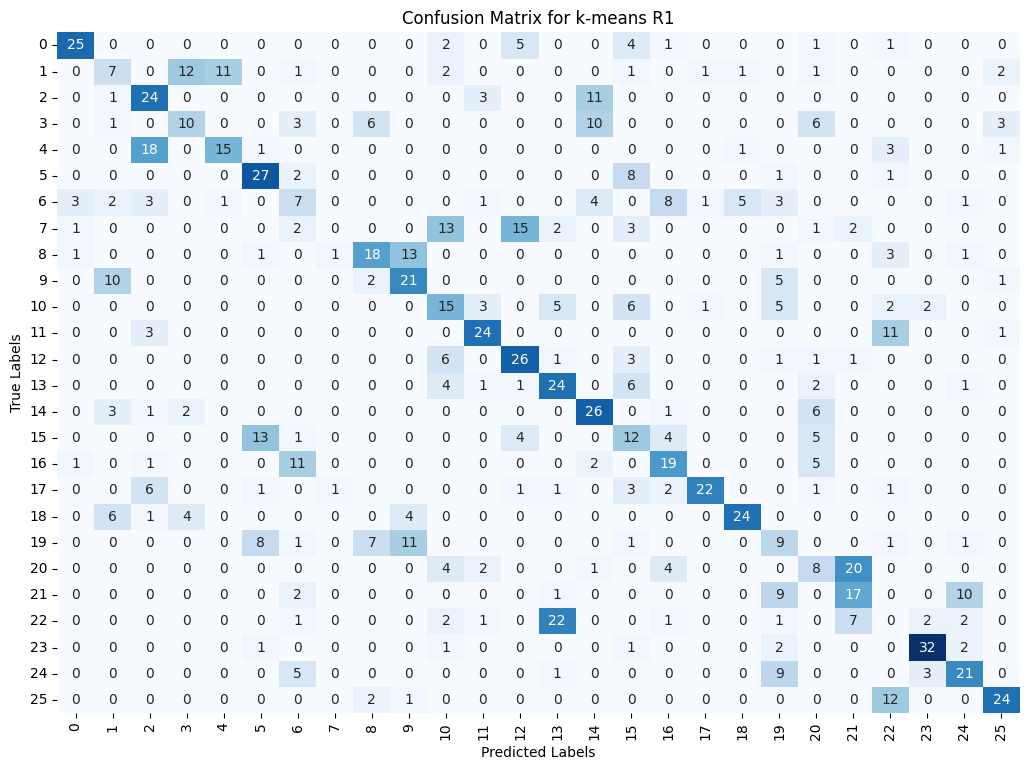

Confusion matrix for k-means R2:


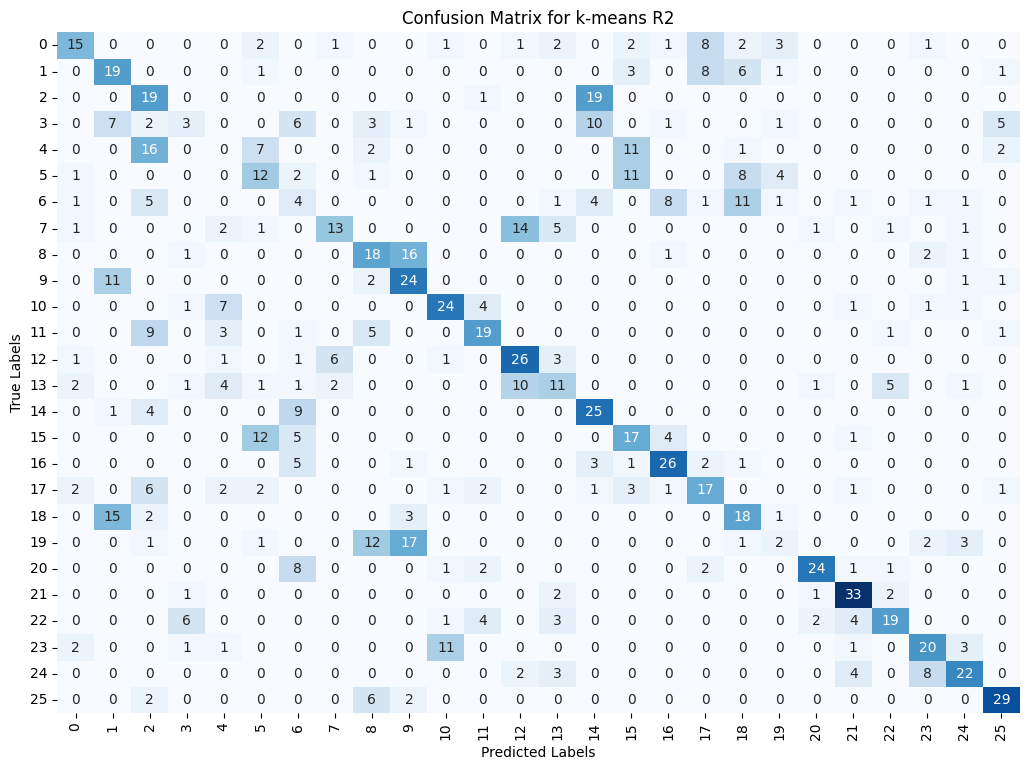

Confusion matrix for k-means HAC:


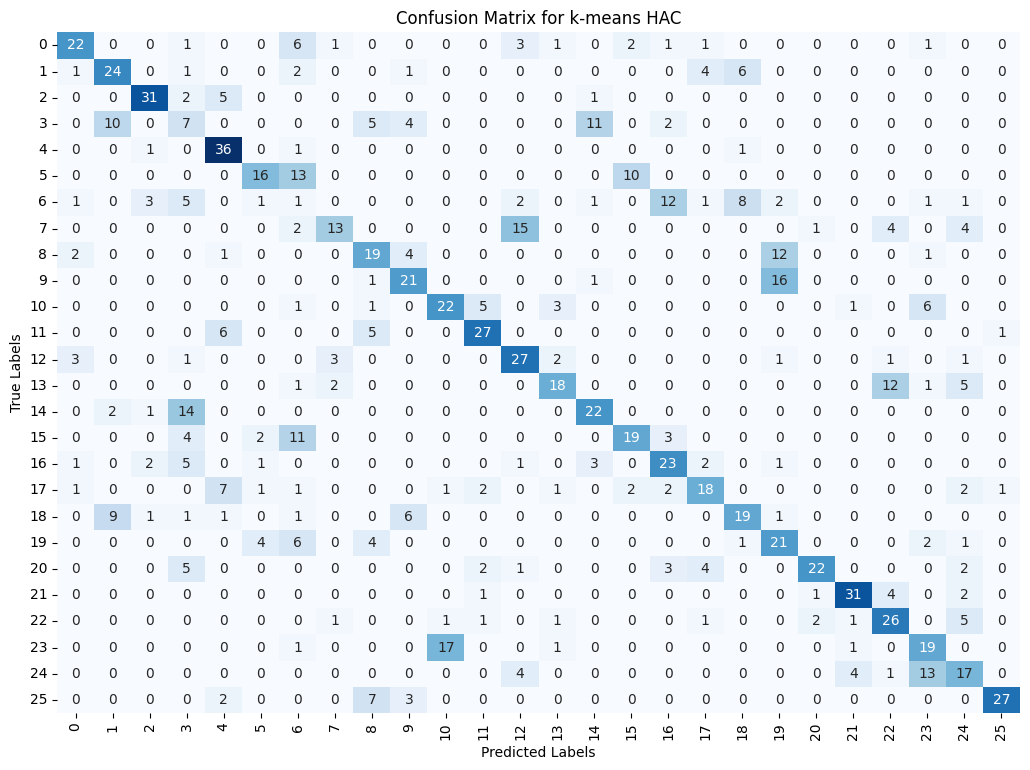

Confusion matrix for PCA+kmeans:


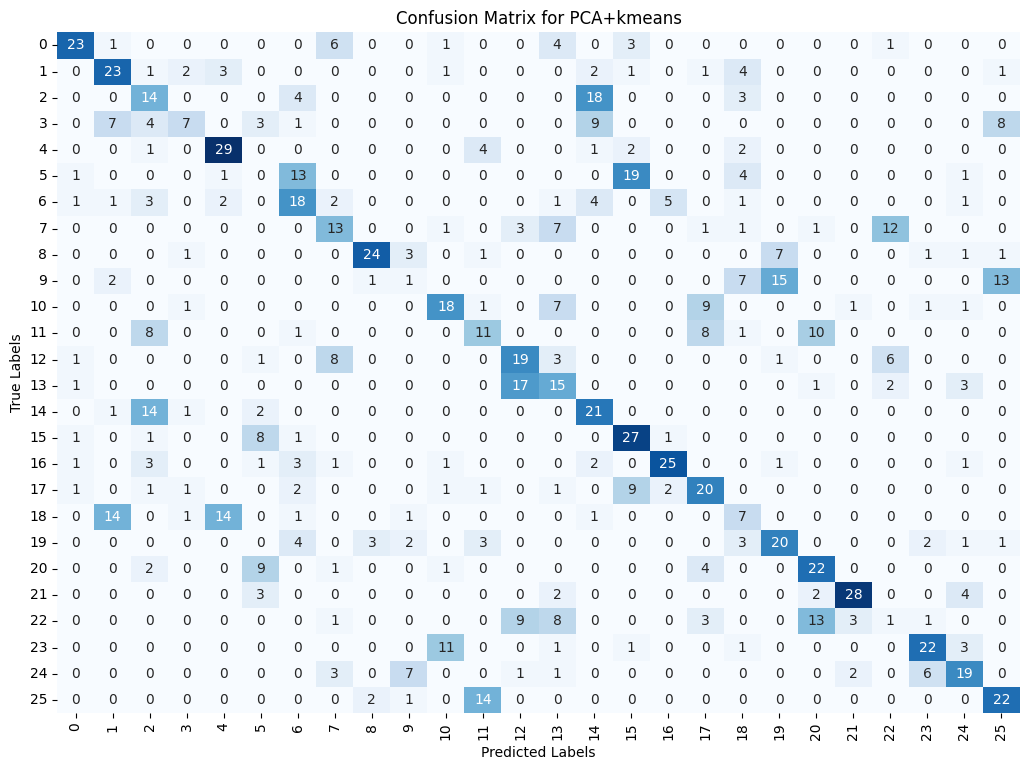


Summary table of execution times and accuracies:
+---+-------------------+--------------------+----------+
|   |      Method       | Execution Time (s) | Accuracy |
+---+-------------------+--------------------+----------+
| 4 |    k-means HAC    |      0.598974      | 0.540434 |
| 1 | PCA-guided KMeans |     213.349061     | 0.477252 |
| 5 |    PCA+kmeans     |     92.390127      | 0.457916 |
| 0 |     KMeans++      |     503.509999     | 0.452001 |
| 3 |    k-means R2     |     173.836412     | 0.443846 |
| 2 |    k-means R1     |     187.303482     | 0.442970 |
+---+-------------------+--------------------+----------+


In [11]:
BA_params = datasets_params["BA_dataset"]
n_clusters = BA_params["n_clusters"]
max_iter = BA_params["max_iter"]
n_runs = BA_params["n_runs"]

evaluate_clustering_methods_over_runs(X, AB_labels_encoded,
                                      n_clusters, max_iter, n_runs, clustering_methods)

# Coil 20
We used 360 images of 5 objects (k=5) from the Coil20 dataset, which consists of grayscale images of various items. Each image has a resolution of 32 × 32 pixels, and we convert them into vectors of dimension 1024.

Total images processed: 360
Total images skipped: 0
Shape of X_coil (features): (360, 1024)
Shape of y (labels): (360,)
Example feature vector:
[0 0 0 ... 0 0 0]
Associated label: 0


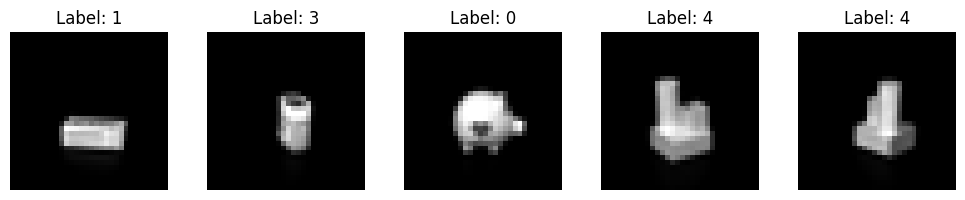

Unique labels: [0 1 2 3 4]


In [12]:
import os
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from tqdm import tqdm  
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.optimize import linear_sum_assignment
import seaborn as sns  
from sklearn.cluster import KMeans

def extract_features_coil20(data_dir):
    """
    Extracts features from the COIL-20 image dataset and stores them in an array X.
    
    Returns:
    - X (np.ndarray): Feature array of size (n_samples, 1024).
    - y (np.ndarray): Array of labels associated with each image.
    """
    # Initialize lists to store data and labels
    data = []
    labels = []
    skipped_images = 0  # Compteur pour les images ignorées

    # Iterate through the files
    for filename in os.listdir(data_dir):
        if filename.endswith('.pgm'):
            try:
                # Load the image
                img_path = os.path.join(data_dir, filename)
                img = Image.open(img_path).convert('L')  # Grayscale
                
                # Resize to 32x32 
                img_resized = img.resize((32, 32))
                
                # Convert the image to a vector
                img_vector = np.array(img_resized).flatten()  
                
                if img_vector.size != 32*32:
                    print(f"Warning: Image '{filename}' has size {img_vector.size}, expected 1024. Skipping.")
                    skipped_images += 1
                    continue 
                
                # Add the vector to the data list
                data.append(img_vector)
                
                label_str = filename.split('__')[0]  
                label_num = int(label_str[3:]) - 1  #
                labels.append(label_num)
            except (IndexError, ValueError) as e:
                print(f"Error extracting label for file '{filename}': {e}")
                skipped_images += 1
                continue  

    # Convert the lists to NumPy arrays
    X = np.array(data)
    y = np.array(labels)

    print(f"Total images processed: {len(data)}")
    print(f"Total images skipped: {skipped_images}")
    
    return X, y

# The directory containing COIL-20 images
current_directory = os.getcwd()
folder_path = os.path.join(current_directory, "Data", "coil-20-unproc", "unprocessed_images")
data_dir = Path(folder_path)  

# Verify the path 
if not data_dir.is_dir():
    raise NotADirectoryError(f"The specified path is not a valid directory: {data_dir}")

# Call the function to extract features
X_coil, y = extract_features_coil20(data_dir)

print(f"Shape of X_coil (features): {X_coil.shape}")  
print(f"Shape of y (labels): {y.shape}")              

if X_coil.size > 0:
    print("Example feature vector:")
    print(X_coil[0])  # First feature vector
    print(f"Associated label: {y[0]}")
else:
    print("No valid images were processed.")

# Visualize a few examples
n_samples_visualize = 5
if X_coil.shape[0] >= n_samples_visualize:
    indices = np.random.choice(X_coil.shape[0], n_samples_visualize, replace=False)
else:
    indices = np.arange(X_coil.shape[0])  

plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices):
    plt.subplot(1, n_samples_visualize, i + 1)
    plt.imshow(X_coil[idx].reshape(32, 32), cmap='gray')
    plt.title(f"Label: {y[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Check unique labels
unique_labels = np.unique(y)
print(f"Unique labels: {unique_labels}")


Evaluating method: KMeans++


KMeans++: 100%|█████████████████████████████████████████████████| 1000/1000 [03:03<00:00,  5.45it/s]


Evaluating method: PCA-guided KMeans


PCA-guided KMeans: 100%|████████████████████████████████████████| 1000/1000 [02:34<00:00,  6.46it/s]


Evaluating method: k-means R1


k-means R1: 100%|███████████████████████████████████████████████| 1000/1000 [02:37<00:00,  6.33it/s]


Evaluating method: k-means R2


k-means R2: 100%|███████████████████████████████████████████████| 1000/1000 [02:38<00:00,  6.31it/s]


Evaluating method: k-means HAC


k-means HAC: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.43it/s]


Evaluating method: PCA+kmeans


PCA+kmeans: 100%|███████████████████████████████████████████████| 1000/1000 [01:12<00:00, 13.79it/s]


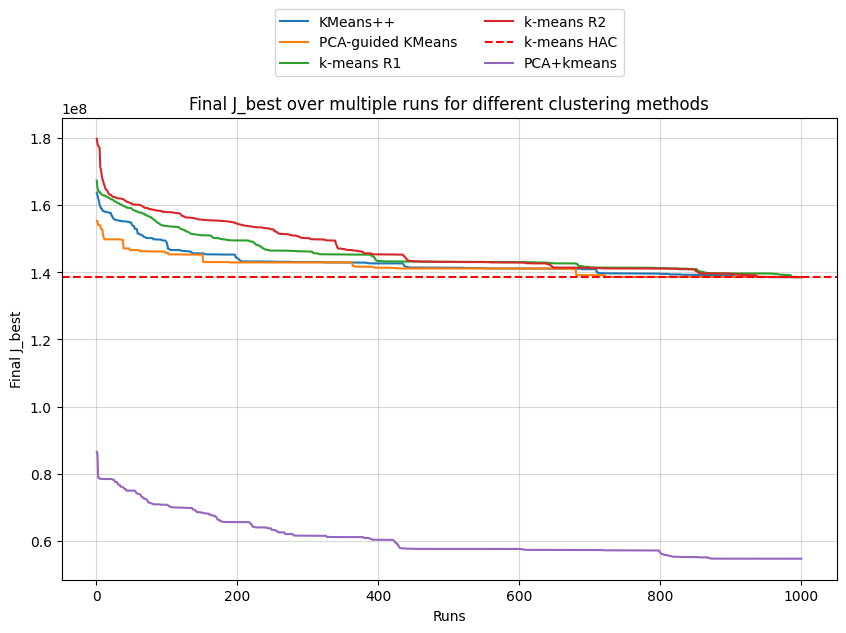

Confusion matrix for KMeans++:


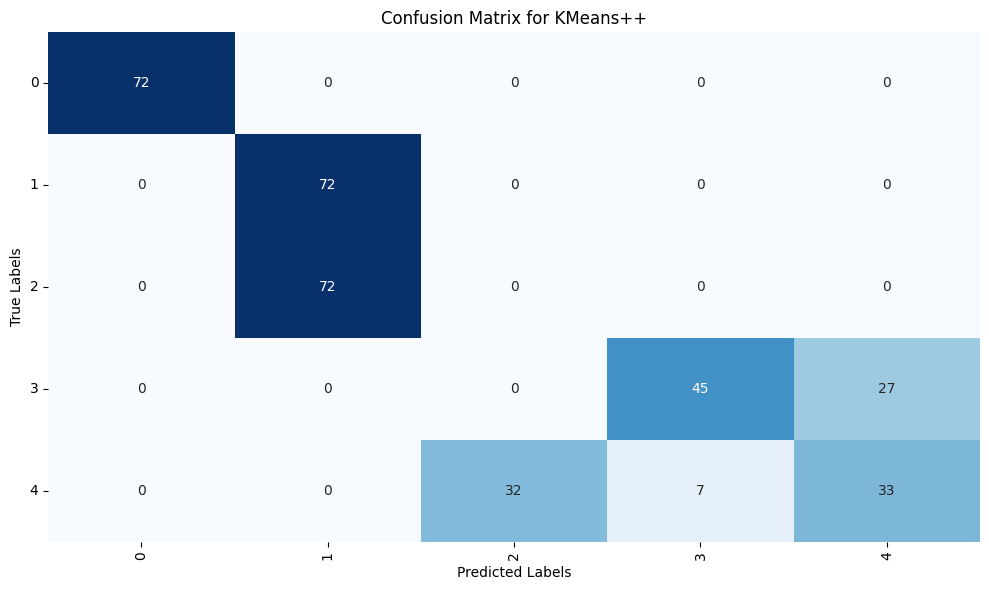

Confusion matrix for PCA-guided KMeans:


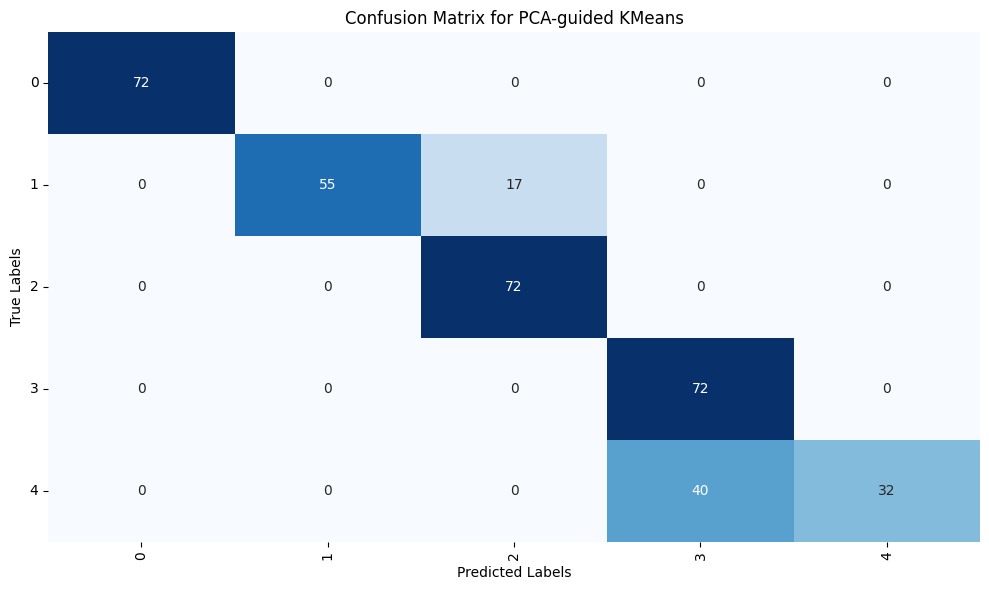

Confusion matrix for k-means R1:


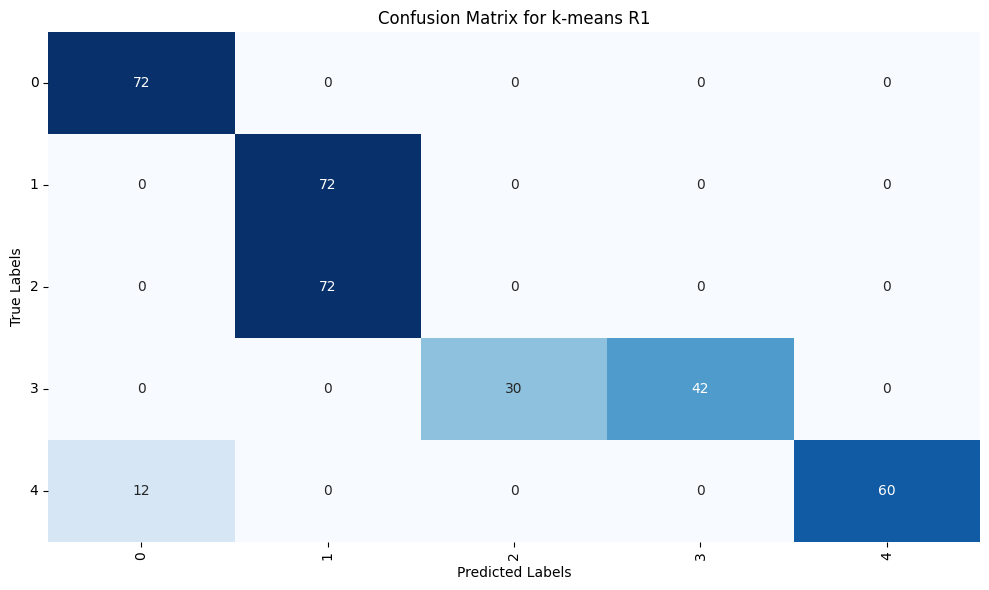

Confusion matrix for k-means R2:


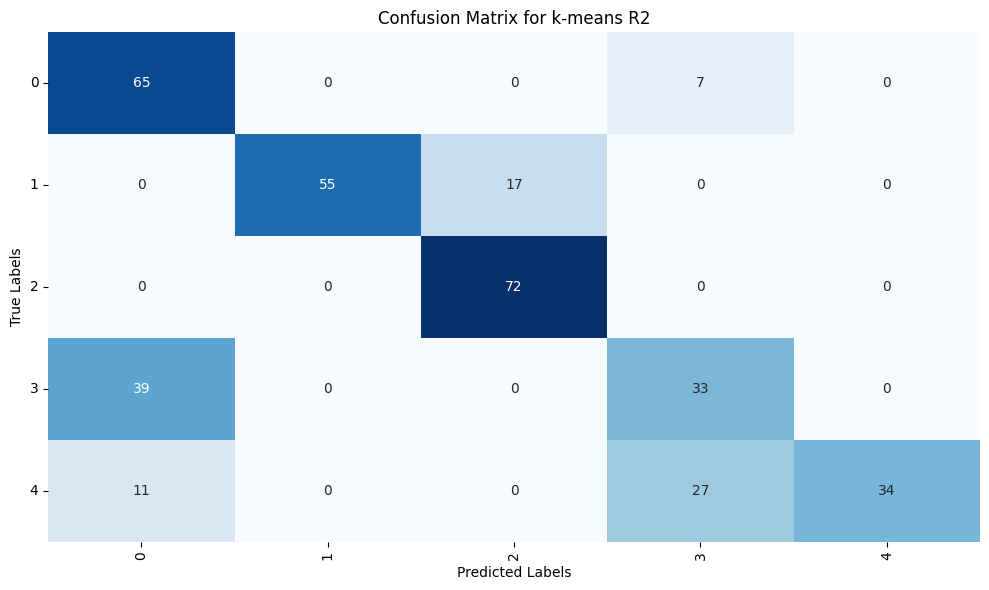

Confusion matrix for k-means HAC:


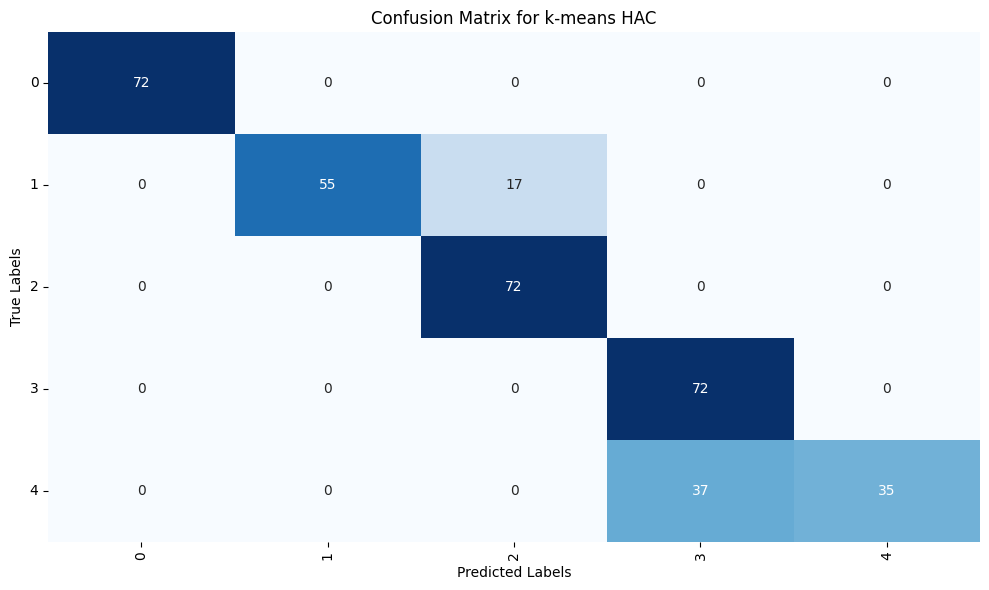

Confusion matrix for PCA+kmeans:


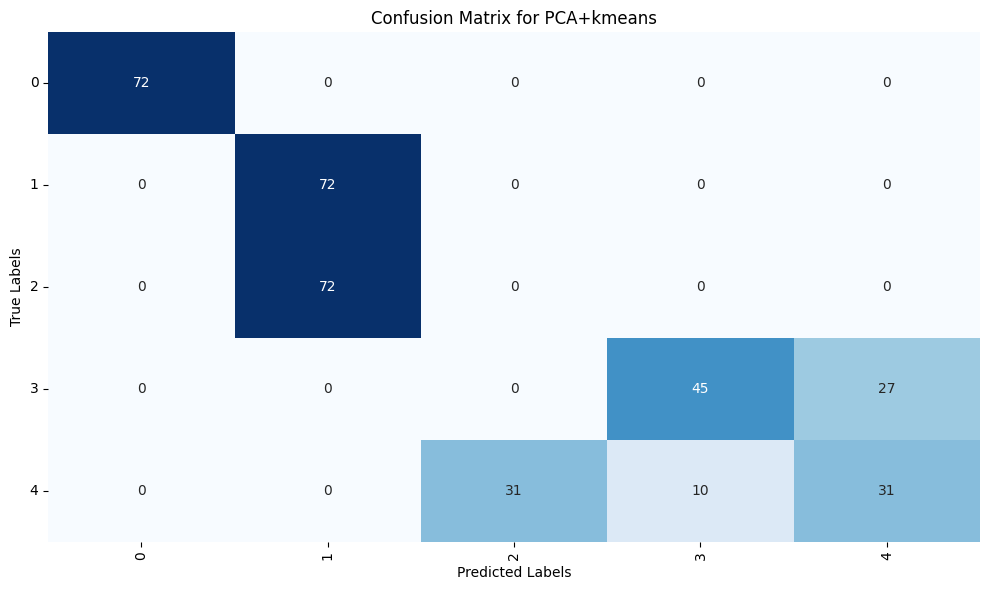


Summary table of execution times and accuracies:
+---+-------------------+--------------------+----------+
|   |      Method       | Execution Time (s) | Accuracy |
+---+-------------------+--------------------+----------+
| 4 |    k-means HAC    |      0.300274      | 0.850000 |
| 1 | PCA-guided KMeans |     154.809169     | 0.762364 |
| 0 |     KMeans++      |     183.575132     | 0.755947 |
| 5 |    PCA+kmeans     |     72.510189      | 0.731192 |
| 2 |    k-means R1     |     157.867226     | 0.726597 |
| 3 |    k-means R2     |     158.488892     | 0.721222 |
+---+-------------------+--------------------+----------+


In [13]:
coil_params = datasets_params["coil20_dataset"]
n_clusters = coil_params["n_clusters"]
max_iter = coil_params["max_iter"]
n_runs = coil_params["n_runs"]

evaluate_clustering_methods_over_runs(X_coil, y,
                                      n_clusters, max_iter, n_runs, clustering_methods)